In [1]:
import pandas as pd
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('../Nuevo intento/movies_dataset.csv')

# Head
movies.head()


C:\Users\esteb\AppData\Local\Temp\ipykernel_12376\2407049704.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('../Nuevo intento/movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
movies = movies.dropna(how='all')

In [6]:
#Transformamos los valores de estas columnas a numéricos.
movies['id'] = pd.to_numeric(movies['id'],errors='coerce',downcast='integer')
movies['budget'] = pd.to_numeric(movies['budget'],errors='coerce',downcast='float')
movies['popularity'] = pd.to_numeric(movies['popularity'],errors='coerce',downcast='float')

In [7]:
#Transformamos la columna release_date a pandas datetime, luego eliminamos los con valores nulos
movies['release_date'] = pd.to_datetime(movies['release_date'],errors='coerce')
movies.dropna(subset = ['release_date'],axis=0,inplace=True)
movies['release_year'] = movies['release_date'].dt.year #Creamos un acolumna extrayendo el año
movies['release_month'] = movies['release_date'].dt.month #Creamos un acolumna extrayendo el mes

In [8]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,release_month
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,10
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2


In [9]:
# Muchos valores nulos en "belongs_to_collection" por lo tanto los llenamos con 1 (pertenece) o 0(no pertenece) 
movies['belongs_to_collection'] = movies['belongs_to_collection'].fillna('None') #Llenamos los NaN con 'none'
movies[['collection_name']] = movies[['belongs_to_collection']].applymap(lambda x: 'None' if x=='None' else ast.literal_eval(x)['name']) #Creamos una nueva columna con el nombre de la coleccion si corresponde, si no es 'None'.
movies['belongs_to_collection'] = movies['belongs_to_collection'].map(lambda x: 0 if x == 'None' else 1) #Si tiene un nombre válido se llena con 1, si tiene un 'none' se llena con 0

In [10]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,release_month,collection_name
0,False,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,10,Toy Story Collection
1,False,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12,None
2,False,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12,Grumpy Old Men Collection
3,False,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12,None
4,False,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2,Father of the Bride Collection


In [11]:
#Eliminamos columnas que no vamos a utilizar
movies.drop(['homepage','original_title','tagline','spoken_languages','adult','imdb_id','overview','poster_path','video'],axis=1,inplace=True)
movies.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name
0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None
2,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,12,None
4,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection


In [12]:
movies.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name
0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None
2,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,12,None
4,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection


In [13]:
#Creamos una función para conocer cuantos valores nulos hay por columna.
def missing_values(df):
    print(f'Total null values count = {df.isna().sum().sum()}')
    return df.isna().sum()

In [14]:
missing_values(movies)

Total null values count = 337


belongs_to_collection      0
budget                     0
genres                     0
id                         0
original_language         11
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                  246
status                    80
title                      0
vote_average               0
vote_count                 0
release_year               0
release_month              0
collection_name            0
dtype: int64

In [15]:

movies['status'].fillna(movies['status'].mode()[0],inplace=True) #Llenamos los nulos de la columna status con la moda
movies['runtime'] = movies['runtime'].replace(0,np.nan) #Transformamos los 0  de la columna runtime en NaN
movies['runtime'].fillna(movies['runtime'].mean(),inplace=True) #Cambiamos los NaN por la mediana
movies['original_language'].fillna(movies['original_language'].mode()[0],inplace=True) #Llenamos los NaN de la columna original_language por la moda

In [16]:
movies['return'] = movies['revenue'] / movies['budget'] #Creamos la columna 'return' con la división entre revenue y budget
movies['success_or_flop'] = movies['return'].map(lambda x: 1 if x>=1 else 0) #Si el retorno es mayor o igual a 1 es marcado como exito, si no, fracaso.
movies.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name,return,success_or_flop
0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,12.451801,1
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None,4.043035,1
2,1,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection,NaN,0
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,12,None,5.090760,1
4,1,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862.0,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection,inf,1


In [17]:
#Esta función convierte una cadena de lista JSON en una lista de valores extraídos de los objetos JSON correspondientes, utilizando la clave 'name' (o el valor especificado por want). Si la cadena no se puede evaluar como una lista o está vacía, se devuelve NaN.
def json_to_list(row,want='name'):
    new_list = ast.literal_eval(row)    
    if new_list == [] or isinstance(new_list,float):
        return (np.nan)
    else:
        inner = []
        for j in new_list:
            inner.append(j[want])
        return (inner)

#Se aplica la funcion a las 3 columnas anidadas.    
movies[['production_companies']] = movies[['production_companies']].applymap(json_to_list)
movies[['production_countries']] = movies[['production_countries']].applymap(lambda row: json_to_list(row ,'iso_3166_1')) #En esta columna se extrae el valor de 'iso_3166_1'
movies[['genres']] = movies[['genres']].applymap(json_to_list)

In [18]:
movies.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name,return,success_or_flop
0,1,30000000.0,"[Animation, Comedy, Family]",862.0,en,21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,12.451801,1
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None,4.043035,1
2,1,0.0,"[Romance, Comedy]",15602.0,en,11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection,NaN,0
3,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,12,None,5.090760,1
4,1,0.0,[Comedy],11862.0,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection,inf,1


In [19]:
missing_values(movies)

Total null values count = 54855


belongs_to_collection        0
budget                       0
genres                    2384
id                           0
original_language            0
popularity                   0
production_companies     11796
production_countries      6211
release_date                 0
revenue                      0
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
release_year                 0
release_month                0
collection_name              0
return                   34464
success_or_flop              0
dtype: int64

In [20]:
# Scaling values in 'budget' or 'revenue'
def scale_money(num):
    if num < 100:
        return num * 1000000
    elif num >= 100 and num < 1000:
        return num * 10000
    elif num >= 1000 and num < 10000:
        return num *100
    else:
        return num
    
movies[['budget', 'revenue']] = movies[['budget', 'revenue']].applymap(scale_money)

In [21]:
movies.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,collection_name,return,success_or_flop
0,1,30000000.0,"[Animation, Comedy, Family]",862.0,en,21.946943,[Pixar Animation Studios],[US],1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,10,Toy Story Collection,12.451801,1
1,0,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[US],1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,12,None,4.043035,1
2,1,0.0,"[Romance, Comedy]",15602.0,en,11.712900,"[Warner Bros., Lancaster Gate]",[US],1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,12,Grumpy Old Men Collection,NaN,0
3,0,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,3.859495,[Twentieth Century Fox Film Corporation],[US],1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,12,None,5.090760,1
4,1,0.0,[Comedy],11862.0,en,8.387519,"[Sandollar Productions, Touchstone Pictures]",[US],1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,2,Father of the Bride Collection,inf,1


In [22]:
def get_all_items(df , col):
    all_items = {}
    for row in df[col]:
        counter = 0
        if row == np.nan or isinstance(row,float) :
            continue
        for single_value in row:  
            value = all_items.get(single_value)
            if value == None:
                all_items[single_value] = counter + 1
            else:
                all_items[single_value] = value + 1
    return all_items

# get all genres
all_genres = get_all_items(movies , 'genres')

# get major production companies
all_companies = get_all_items(movies ,'production_companies')
major_prod_company = {k:v for (k,v) in all_companies.items() if v > 50}

# get all production countries
all_countries = get_all_items(movies ,'production_countries')

In [23]:
# finding all the franchise names with revenue ,budget,popularity
franchise = movies.dropna().groupby(by='collection_name').agg({'revenue':['sum','mean'], 
                                                               'budget':['sum','mean'],
                                                               'title':'count',
                                                               'popularity':'mean'
                                                              })
most_films_franchise = franchise.sort_values([('title','count')],ascending=False)[1:20]

In [24]:
# franchise with highest popularity
highest_popularity_franchises = franchise.sort_values([('popularity','mean')],ascending=False)[1:20]
highest_popularity_franchises

revenue                \
                                                 sum          mean   
collection_name                                                      
Deadpool Collection                     7.831130e+08  7.831130e+08   
Avatar Collection                       2.787965e+09  2.787965e+09   
Despicable Me Collection                3.691070e+09  9.227676e+08   
Guardians of the Galaxy Collection      1.636745e+09  8.183724e+08   
John Wick Collection                    2.603015e+08  1.301508e+08   
Blade Runner Collection                 3.313962e+07  3.313962e+07   
Planet of the Apes (Reboot) Collection  1.563413e+09  5.211376e+08   
The Avengers Collection                 2.924962e+09  1.462481e+09   
Captain America Collection              2.238641e+09  7.462136e+08   
The Maze Runner Collection              6.595768e+08  3.297884e+08   
The Dark Knight Collection              2.463716e+09  8.212387e+08   
The Hunger Games Collection             2.944163e+09  7.360407e+08   
Pirates of the Caribbean Collection     4.521577e+09  9.043154e+08   
Prometheus Collection                   6.355504e+08  3.177752e+08   
Fantastic Beasts Collection             8.093423e+08  8.093423e+08   
Pacific Rim Collection                  4.076029e+08  4.076029e+08   
Thor Collection                         1.093898e+09  5.469490e+08   
The Godfather Collection                4.293753e+08  1.431251e+08   
Fifty Shades Collection                 9.498336e+08  4.749168e+08   

                                              budget               title  \
                                                 sum          mean count   
collection_name                                                            
Deadpool Collection                     5.800000e+07  5.800000e+07     1   
Avatar Collection                       2.370000e+08  2.370000e+08     1   
Despicable Me Collection                2.990000e+08  7.475000e+07     4   
Guardians of the Galaxy Collection      3.700000e+08  1.850000e+08     2   
John Wick Collection                    6.000000e+07  3.000000e+07     2   
Blade Runner Collection                 2.800000e+07  2.800000e+07     1   
Planet of the Apes (Reboot) Collection  4.150000e+08  1.383333e+08     3   
The Avengers Collection                 5.000000e+08  2.500000e+08     2   
Captain America Collection              5.600000e+08  1.866667e+08     3   
The Maze Runner Collection              9.500000e+07  4.750000e+07     2   
The Dark Knight Collection              5.850000e+08  1.950000e+08     3   
The Hunger Games Collection             4.900000e+08  1.225000e+08     4   
Pirates of the Caribbean Collection     1.250000e+09  2.500000e+08     5   
Prometheus Collection                   2.270000e+08  1.135000e+08     2   
Fantastic Beasts Collection             1.800000e+08  1.800000e+08     1   
Pacific Rim Collection                  1.800000e+08  1.800000e+08     1   
Thor Collection                         3.200000e+08  1.600000e+08     2   
The Godfather Collection                7.300000e+07  2.433333e+07     3   
Fifty Shades Collection                 9.500000e+07  4.750000e+07     2   

                                        popularity  
                                              mean  
collection_name                                     
Deadpool Collection                     187.860489  
Avatar Collection                       185.070892  
Despicable Me Collection                157.804459  
Guardians of the Galaxy Collection      119.311295  
John Wick Collection                    116.558945  
Blade Runner Collection                  96.272377  
Planet of the Apes (Reboot) Collection   87.720253  
The Avengers Collection                  63.633537  
Captain America Collection               61.307812  
The Maze Runner Collection               59.081829  
The Dark Knight Collection               57.418396  
The Hunger Games Collection              54.766747  
Pirates of the Caribbean Collection 

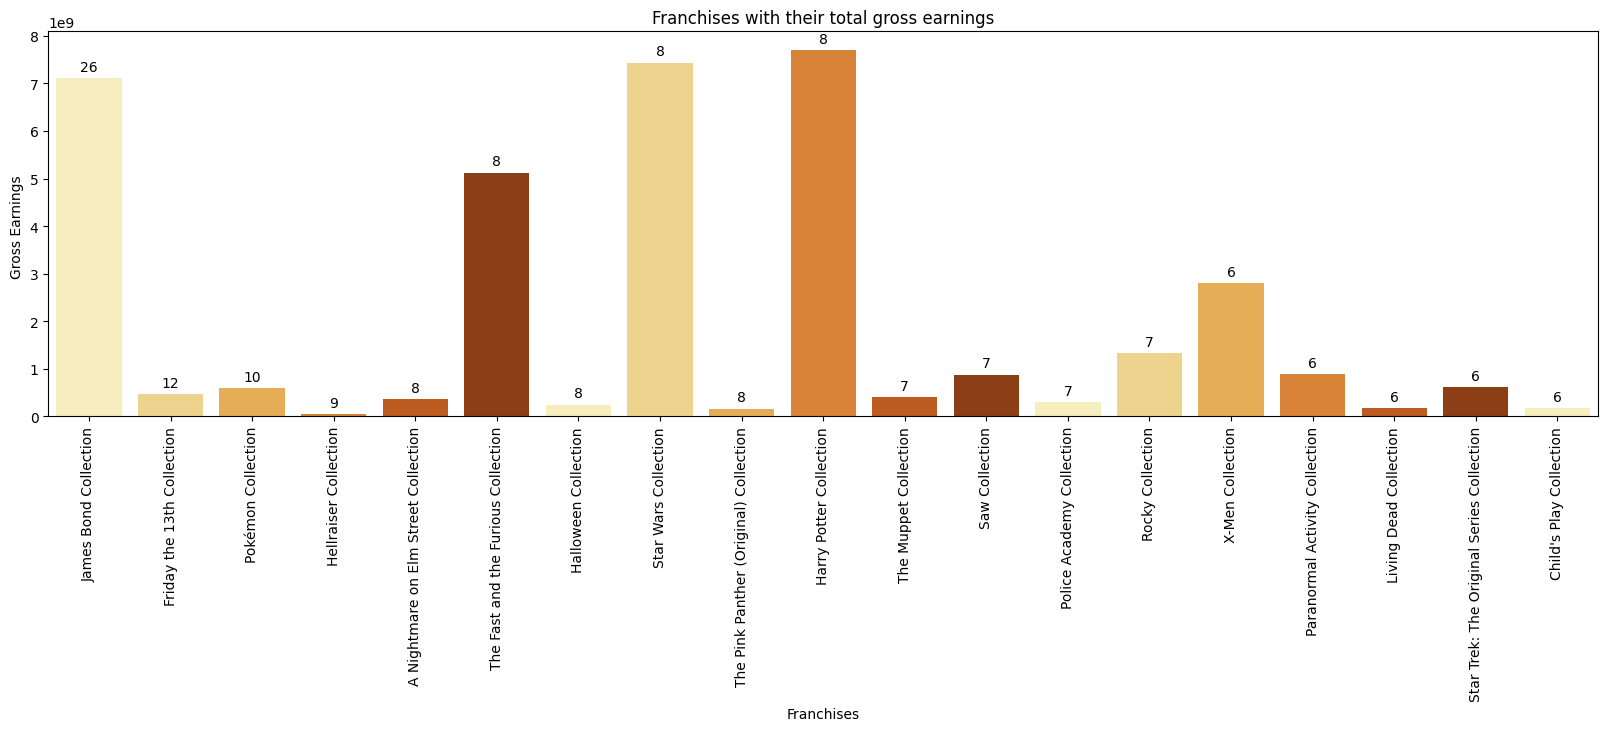

In [25]:
plt.figure(figsize=(20,5))
ax = sns.barplot(y=most_films_franchise[('revenue','sum')],x=most_films_franchise.index,errorbar=None , palette = sns.color_palette("YlOrBr"))
plt.xlabel('Franchises')
plt.title('Franchises with their total gross earnings')
plt.ylabel('Gross Earnings ')
plt.xticks(rotation=90)


count = most_films_franchise[('title','count')]
ax.bar_label(ax.containers[0], labels=count, padding=3)

plt.show()